# Week 4 - Aditya Sumbaraju

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [2]:

## loading required modules
from __future__ import print_function, division

import nsfg

In [4]:
## Import further modules
%matplotlib inline
import first
import numpy as np
import thinkstats2
import thinkplot

In [5]:
## load data

paradox_data = nsfg.ReadFemResp()

In [6]:
## create the distribution (pmf) for numkdhh
pmf = thinkstats2.Pmf(paradox_data.numkdhh, label='Respondent Variable: NUMKDHH')

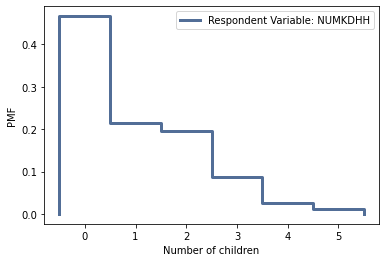

In [7]:
## visualize the distribution
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [8]:
## creating the biased distribution function
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

In [9]:
## Computing the biased distributions
biased_dist = BiasPmf(pmf, label='Biased Distribution')
## Visualizing the distribution


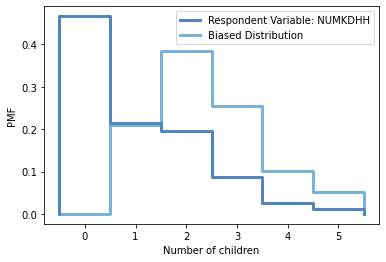

In [10]:
## Plotting the actual and biased distributions
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_dist])
thinkplot.Config(xlabel='Number of children', ylabel='PMF')


In [11]:
## mean for the actual
pmf.Mean()


1.024205155043831

In [12]:
# Mean for the biased
biased_dist.Mean()

2.403679100664282

## exercise 3-2

In [13]:
## Create PmFMean function for computing mean
def PmfMean(pmf):
    mean = 0.0
    for x, p in pmf.d.items():
        mean += p * x
    return mean

## Create pmfVar for Computing variance of the PMF
def PmfVar(pmf, mu=None):
    if mu is None:
        mu = pmf.Mean()
    var = 0.0
    for x, p in pmf.d.items():
        var += p * (x - mu) ** 2
    return var


In [14]:
## Testing the functions: biased mean
PmfMean(biased_dist)

2.403679100664282

In [15]:
## ACtual mean
PmfMean(pmf)

1.024205155043831

The functions are consistent

## Exercise 4-1

In [16]:
def MakeFrames():
    
    preg = nsfg.ReadFemPreg()

    live = preg[preg.outcome == 1]
    firsts = live[live.birthord == 1]
    others = live[live.birthord != 1]

    assert len(live) == 9148
    assert len(firsts) == 4413
    assert len(others) == 4735

    return live, firsts, others


In [17]:
live, firsts, others = MakeFrames()

In [18]:
## Computing the birth weight of first babies and the others
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('First Babies', len(first_wgt), len(first_wgt_dropna))
 
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print('Other Babies', len(other_wgt), len(other_wgt_dropna))

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='First Babies')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='Other Babies')

First Babies 4413 4363
Other Babies 4735 4675


## Weigh at Birth

In [19]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')
## Percentile ranks
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [20]:
## Weight at birth as a first baby
first_cdf.PercentileRank(9)

93.1469172587669

In [21]:
## Weight at birth for other baby
other_cdf.PercentileRank(9)

91.8716577540107

## Exercise 4-2

In [22]:
## Generating 1000 random numbers
ran_numbers = np.random.random(1000)
ran_numbers

array([4.14072421e-01, 8.96158142e-02, 2.05630989e-01, 4.00264832e-01,
       6.23607802e-01, 6.53825548e-01, 8.66476196e-01, 8.94942143e-01,
       6.93314944e-02, 8.96734694e-01, 4.80788190e-02, 9.80138894e-01,
       5.60243861e-01, 3.97713856e-01, 1.38991895e-01, 8.27144851e-01,
       7.80805565e-01, 7.41709740e-01, 2.56142912e-02, 2.27661554e-01,
       2.81513425e-01, 4.66778868e-01, 2.96764064e-01, 4.43016708e-01,
       6.32294849e-01, 6.19429748e-02, 1.68244082e-01, 6.37764042e-01,
       1.38692247e-01, 8.27874987e-01, 1.04728206e-01, 9.76453289e-01,
       5.17184545e-02, 4.55352136e-01, 6.85134660e-01, 5.28167461e-01,
       5.59650186e-01, 9.82411743e-01, 1.22867055e-01, 4.41343804e-01,
       2.45195185e-02, 8.94732525e-01, 7.74089404e-01, 9.27404148e-01,
       1.56781696e-01, 2.78736288e-02, 6.60991460e-01, 7.11543885e-01,
       4.94325302e-01, 8.83668254e-01, 4.27747688e-02, 3.96573922e-01,
       3.94129649e-01, 5.08096803e-01, 5.28121852e-01, 5.07496082e-01,
      

### Plotting the distributions


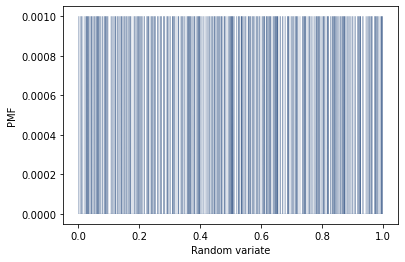

In [23]:
## pmf
# Solution

pmf = thinkstats2.Pmf(ran_numbers)
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random variate', ylabel='PMF')

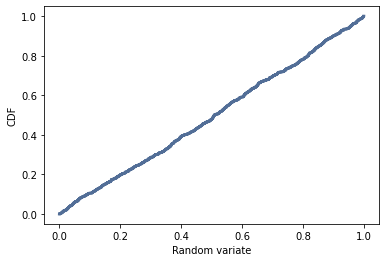

In [24]:
## cdf
cdf = thinkstats2.Cdf(ran_numbers)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random variate', ylabel='CDF')

From the *PFM* plot, the variable has a uniform distribution. 